# Simple example to illustrate SGDClassifier

A series of points on the 2D plane are labeled by the colors ['red', 'green', 'blue']

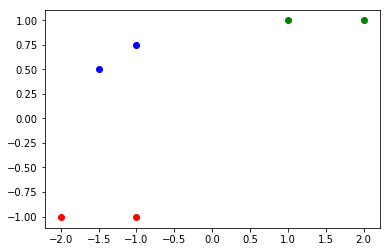

In [4]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1],[-1.5,0.5],[-1,0.75]])
Y = np.array([1, 1, 2, 2, 3, 3])
cols = ['red', 'green', 'blue']

plt.scatter(X[:,0][Y==1],X[:,1][Y==1],c=cols[0])
plt.scatter(X[:,0][Y==2],X[:,1][Y==2],c=cols[1])
plt.scatter(X[:,0][Y==3],X[:,1][Y==3],c=cols[2])
plt.show()

We need to segregate the points in their own colored groups. This is what the SGDClassifier does. It classifies each point to their own group. We labeled the colors with numerical values in Y. red is Y=1, blue is Y=2, green is Y=3.

In [0]:
# import the classifier
from sklearn import linear_model

# set up the SGDClassifier object by passing tunable parameters to the constructor
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

We can set the tolerance to 0.001 (=10^-3=1e-3). If the SVM cost function has a value below that then we are satisfied with the support vector decision boundary (the plane with separates two classes of points). Now we fit the model. This is where the Gradient descent function will run based on our chosen parameters 

In [6]:
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

The decision boundary is defined by a hyperlane which separates the classes. The coefficients and intercept of the hyperplane are stored in clf.coef_ and intercept_. There are 2 coefficients and 1 intercept for each hyperplane. There are 3 decision boundaries separating 3 color classes. Therefore, clf.coef_ is an array of size 3x2 (3 color classes and 2 intercepts). clf.intercept_ is an array of size 3x1.

In [7]:
clf.coef_

array([[ -4.77554919, -23.87774594],
       [ 19.21229587,   2.40153698],
       [-18.77934272,  25.82159624]])

In [10]:
 clf.intercept_

array([-10.0098909 ,  -0.04975124, -19.92820012])

The coefficients of the first hyperplane is (-4.77554919, -23.87774594) with intercept -10.0098909

## Plotting the decision boundaries

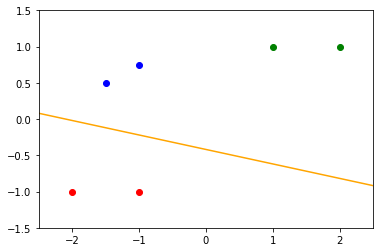

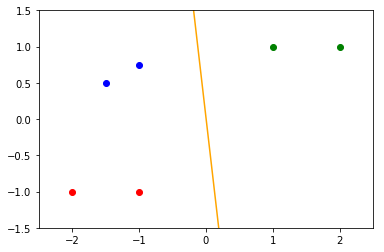

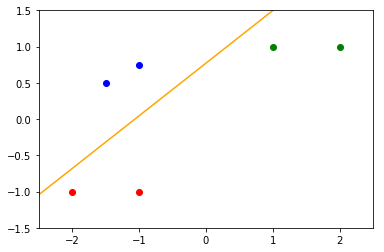

In [13]:
x = np.array([-2.5, 2.5])

for i in range(3):
  plt.scatter(X[:,0][Y==1],X[:,1][Y==1],c=cols[0])
  plt.scatter(X[:,0][Y==2],X[:,1][Y==2],c=cols[1])
  plt.scatter(X[:,0][Y==3],X[:,1][Y==3],c=cols[2])

  y = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
  plt.plot(x,y,c='orange')

  plt.xlim(-2.5,2.5)
  plt.ylim(-1.5,1.5)
  plt.show()

The equation of a 2D hyperplane is:
m1*x + m2*y + c = 0
or 
y = - (m1*x + c)/m2.
A straight is plotted using plt.plot(x,y) where x = list of x-coord and y=list of y-coord.
The line starts at x= -2.5 and ends at x=2.5. The y-coordinate is calculated from clf.coef_


In [36]:
x = np.array([-2.5, 2.5])
y = np.zeros((3,2))
for i in range(3):
  y[i] = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
#   print(y[i])
print(x,y[0])

[-2.5  2.5] [ 0.08078577 -0.91921423]


### Plotting all decision boundaries

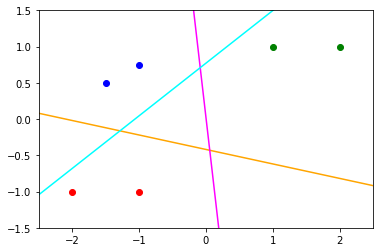

In [39]:
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],c=cols[0])
plt.scatter(X[:,0][Y==2],X[:,1][Y==2],c=cols[1])
plt.scatter(X[:,0][Y==3],X[:,1][Y==3],c=cols[2])

x = np.array([-2.5, 2.5])
y = np.zeros((3,2))
for i in range(3):
  y[i] = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
plt.plot(x,y[0],c='orange')
plt.plot(x,y[1],c='magenta')
plt.plot(x,y[2],c='cyan')
plt.xlim(-2.5,2.5)
plt.ylim(-1.5,1.5)
plt.show()

## Predict the class

Let's say we have a point at (1,0) whose class we want to predict. By inspecting the above plot of the colored points it is clear that is a green point. Let's test our intuition.

In [41]:
# remind ourselves of the numerical values assigned to the colors
# Y = np.array([1, 1, 2, 2, 3, 3])
# cols = ['red', 'green', 'blue']
p = [[1,0]]
clf.predict(p)

array([2])

2 == green. So the point is correctly classified. It is important to note the dimensions of the list object passed to clf.predict(). p=[1,0] will result in an error as clf.predict() expects a list of points not just one point.

In [0]:
# test other points here